# <font color = "green"> Introduction to Basic Image Manipulation and Annotation using OpenCV </font>

Welcome to this tutorial on Basic Image Manipulation and Annotation using OpenCV. In this notebook, we will explore essential techniques for modifying and annotating images, such as resizing, cropping, flipping, and drawing various shapes and text. This guide is designed for beginners and aims to provide a practical, easy-to-follow introduction to image processing with OpenCV. Let's dive into the world of computer vision and learn how to enhance and annotate images effectively!

# Table of Contents

1. [Accessing and Manipulating Individual Pixels](#1.)
<br>
2. [Cropping Images](#2.)
<br>
3. [Resizing Images](#3.)
<br>
4. [Flipping Images](#4.)
5. [Drawing Lines on Images](#5.)
6. [Drawing Circle on Images](#6.)
7. [Drawing Rectangle on Images](#7.)
8. [Adding Text on Images](#8.)

## Importing Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

<a id = "1."></a>
# 1. Accessing and Manipulating Individual Pixels

In this section, we'll learn how to access and modify individual pixels in an image using OpenCV. This fundamental skill is crucial for understanding how digital images are composed and manipulated. We'll cover how to load an image, read pixel values, and change them to alter the image's appearance, providing a solid foundation for more advanced image processing techniques.

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]

 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]

 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]

 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]

 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]

 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]

 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]

 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]

 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]

 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]

 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]

 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]

 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]

 [  0   0   

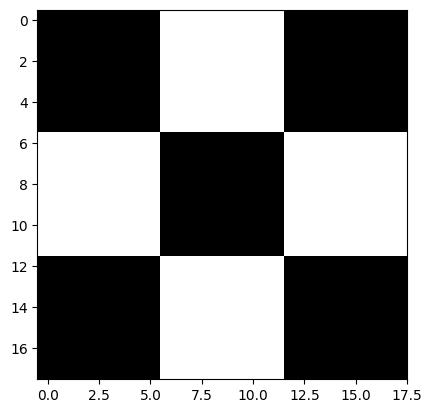

In [2]:
# Reading image as gray scale.
cb_img = cv2.imread("checkerboard_18x18.png", cv2.IMREAD_GRAYSCALE)

# Print the image data (pixel values), element of a 2D numpy array.
# Each pixel value is 8-bits [0,255]
print(cb_img)

# Set color map to gray scale for proper rendering.
plt.imshow(cb_img, cmap="gray");

### Accessing Individual Pixel

Let us see how to access a pixel in the image.

Images are represented as NumPy arrays, with pixels accessible by their coordinates. For accessing any pixel in a Numpy array, you have to use matrix notation such as matrix[r,c], where the r is the row number and c is the column number. Also note that the matrix is 0-indexed.

For example, if you want to access the first pixel, you need to specify matrix[0,0]. Let us see with some examples. We will print one black pixel from top-left and one white pixel from top-center.

In [3]:
# print the first pixel of the first black box
print(cb_img[0, 0])

0


In [4]:
# print the white pixel to the right of the first black box
print(cb_img[0, 6])

255


### Modifying Individual Pixel

In a grayscale image using OpenCV, modifying a pixel involves changing its intensity value, which ranges from 0 (black) to 255 (white). You simply assign a new intensity value to the pixel's coordinates in the image array, like `image[y, x] = new_intensity_value`. This approach is effective for precise, pixel-level adjustments but can be resource-intensive for extensive modifications across large images.

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]

 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]

 [  0   0  60 120   0   0 255 255 255 255 255 255   0   0   0   0   0   0]

 [  0   0 180 240   0   0 255 255 255 255 255 255   0   0   0   0   0   0]

 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]

 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]

 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]

 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]

 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]

 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]

 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]

 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]

 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]

 [  0   0   

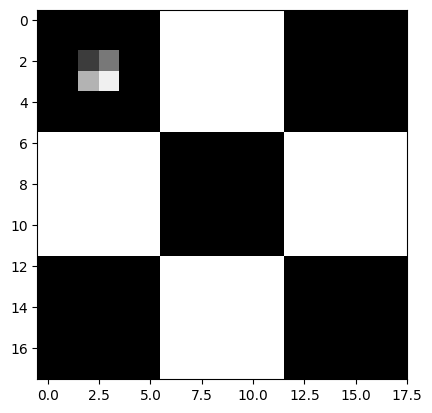

In [5]:
# copying the original image
cb_img_copy = cb_img.copy()

cb_img_copy[2, 2] = 60
cb_img_copy[2, 3] = 120
cb_img_copy[3, 2] = 180
cb_img_copy[3, 3] = 240

plt.imshow(cb_img_copy, cmap = "gray");
print(cb_img_copy)

<a id = "2."></a>
# 2. Cropping Images

In this section, we focus on cropping images, a fundamental and widely used image manipulation technique. Cropping refers to the process of extracting a subregion of an image, effectively cutting out a portion to create a new image. This technique is useful in various scenarios, such as focusing on a particular subject, removing unwanted areas, or adjusting the composition of a photo.

We will demonstrate how to specify the coordinates of the rectangular area you wish to keep and use these coordinates to extract that portion of the image using OpenCV. The process is straightforward and involves selecting the start and end points (coordinates) of the desired region and then slicing the image array accordingly. This hands-on example will provide a clear understanding of how to effectively crop images for different purposes.

Shape:  (667, 1000, 3)


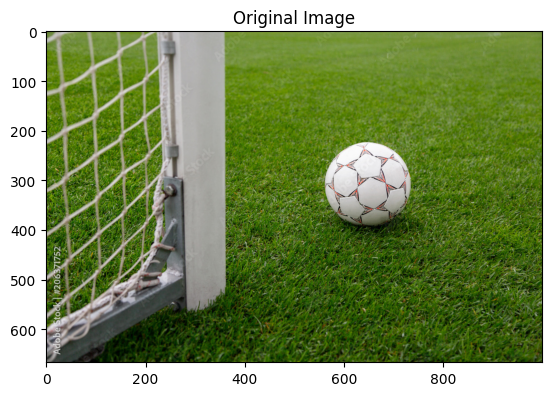

In [6]:
fb_img_bgr = cv2.imread("football.jpg", cv2.IMREAD_COLOR)

# Reversing the channels of the color image
fb_img_rgb = fb_img_bgr[:, :, ::-1]
print("Shape: ", fb_img_rgb.shape)
plt.title("Original Image")
plt.imshow(fb_img_rgb);

### Cropping the area containing a football

Cropping an image involves selecting a rectangular region from this array. This is done using Python's slicing notation.

Given coordinates **(x, y, w, h)**:

**x, y**: Coordinates of the top-left corner of the crop rectangle.
<br>
**w, h**: Width and height of the crop rectangle.
<br>
<br>
The slicing operation `cropped_image = image[y:y+h, x:x+w]` extracts the part of the image:

**y:y+h**: Selects rows (vertical slice) from y to y+h.
<br>
**x:x+w**: Selects columns (horizontal slice) from x to x+w.
This results in a new array representing the cropped section of the image.

Shape:  (200, 200, 3)


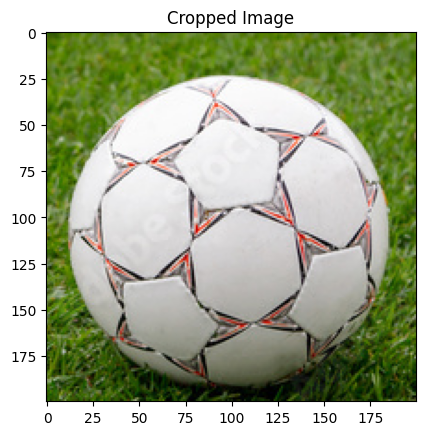

In [7]:
x, y, w, h = 550, 200, 200, 200
cropped_image = fb_img_rgb[y:y+h, x:x+w]
print("Shape: ", cropped_image.shape)
plt.title("Cropped Image")
plt.imshow(cropped_image);

<a id = "3."></a>
# 3. Resizing images

This section of the notebook introduces the concept and techniques of altering the dimensions of an image. Resizing is a fundamental image processing operation, often used to reduce the size of an image for faster processing, to fit specific dimensions required by an application, or to enlarge a smaller image for analysis or printing.

In this part, we will explore how to use OpenCV to change the size of an image. We'll cover how to specify new dimensions for the image, and discuss the importance of maintaining the aspect ratio to avoid distortion. This section will also highlight different interpolation methods used during resizing, such as **linear or cubic interpolation**, which affect the quality of the resized image. Practical examples will be provided to ensure a clear understanding of how to effectively resize images for various applications.

The function **`resize`** resizes the image `src` down to or up to the specified size. The size and type are derived from the `src`,`dsize`,`fx`, and `fy`.

``` python
dst = resize( src, dsize[, dst[, fx[, fy[, interpolation]]]] )
```

`dst`: output image; it has the size dsize (when it is non-zero) or the size computed from src.size(), fx, and fy; the type of dst is the same as of src.

The function has **2 required arguments**:
    
1. `src`:	input image

2. `dsize`: output image size

Optional arguments that are often used include:

1. `fx`: Scale factor along the horizontal axis; when it equals 0, it is computed as (𝚍𝚘𝚞𝚋𝚕𝚎)𝚍𝚜𝚒𝚣𝚎.𝚠𝚒𝚍𝚝𝚑/𝚜𝚛𝚌.𝚌𝚘𝚕𝚜

2. `fy`: Scale factor along the vertical axis; when it equals 0, it is computed as (𝚍𝚘𝚞𝚋𝚕𝚎)𝚍𝚜𝚒𝚣𝚎.𝚑𝚎𝚒𝚐𝚑𝚝/𝚜𝚛𝚌.𝚛𝚘𝚠𝚜

### Method 1: Specifying the scaling factor using fx and fy

Shape:  (400, 400, 3)


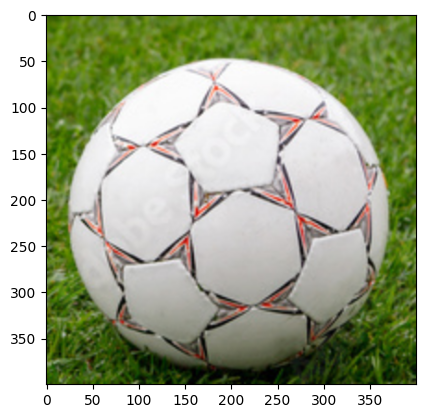

In [8]:
# fx = 2 and fy = 2 means double the width and height of the image respectively
# None means ignore the dsize parameter and instead use the scaling factors provided (fx and fy) to determine the new size
resized_cropped_image_2x = cv2.resize(cropped_image, None, fx = 2, fy = 2)
print("Shape: ", resized_cropped_image_2x.shape)
plt.imshow(resized_cropped_image_2x);

### Method 2: Specifying the exact size of the output image

Shape:  (200, 100, 3)


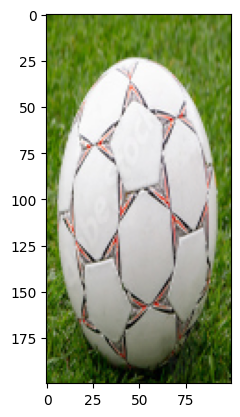

In [9]:
desired_width = 100
desired_height = 200
dim = (desired_width, desired_height)

resized_cropped_image = cv2.resize(cropped_image, dsize = dim, interpolation = cv2.INTER_AREA) # INTER_AREA: Best for shrinking images, averages pixels within areas
print("Shape: ", resized_cropped_image.shape)
plt.imshow(resized_cropped_image);

### Maintaining aspect ratio

Shape:  (100, 100, 3)


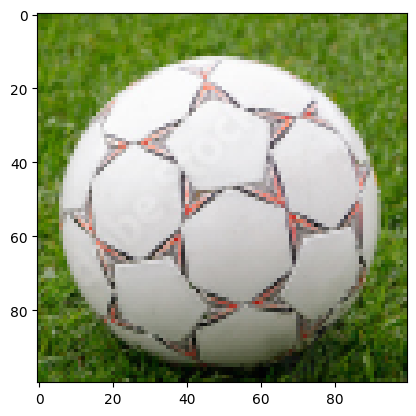

In [10]:
desired_width = 100
aspect_ratio = desired_width / cropped_image.shape[1]
desired_height = int(cropped_image.shape[0] * aspect_ratio)
dim = (desired_width, desired_height)

resized_cropped_image = cv2.resize(cropped_image, dsize = dim, interpolation = cv2.INTER_AREA)
print("Shape: ", resized_cropped_image.shape)
plt.imshow(resized_cropped_image);

### Displaying the cropped resized image

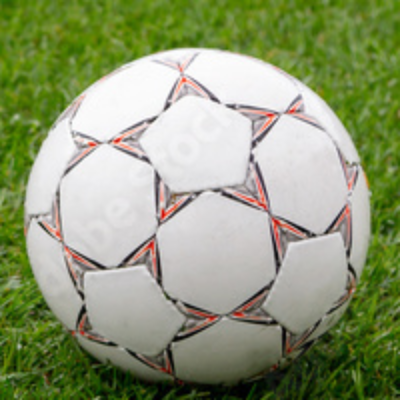

In [11]:
# Swap channel order
resized_cropped_image_2x = resized_cropped_image_2x[:, :, ::-1]

# Save resized image to disk
cv2.imwrite("resized_cropped_image_2x.png", resized_cropped_image_2x)

# Display the cropped and resized image
Image(filename="resized_cropped_image_2x.png")

<a id = "4."></a>
# 4. Flipping Images

This section of the notebook is dedicated to the technique of flipping images, a common image processing task. Flipping an image refers to mirroring it across a specified axis. This can be used for various purposes like creating reflections, correcting orientation, or simply for artistic effects.

We will explore how to use OpenCV to flip images both horizontally and vertically. Horizontal flipping mirrors the image across the vertical axis, while vertical flipping mirrors it across the horizontal axis. The process in OpenCV is straightforward, utilizing the `cv2.flip()` function, which requires specifying the image and the flip direction. 0 means flipping around the x-axis and positive value (for example, 1) means flipping around y-axis. Negative value (for example, -1) means flipping around both axes.

Through practical examples, this section will demonstrate how to effectively apply both types of flips. This will not only enhance your understanding of image manipulation with OpenCV but also provide a useful tool for various image processing applications.

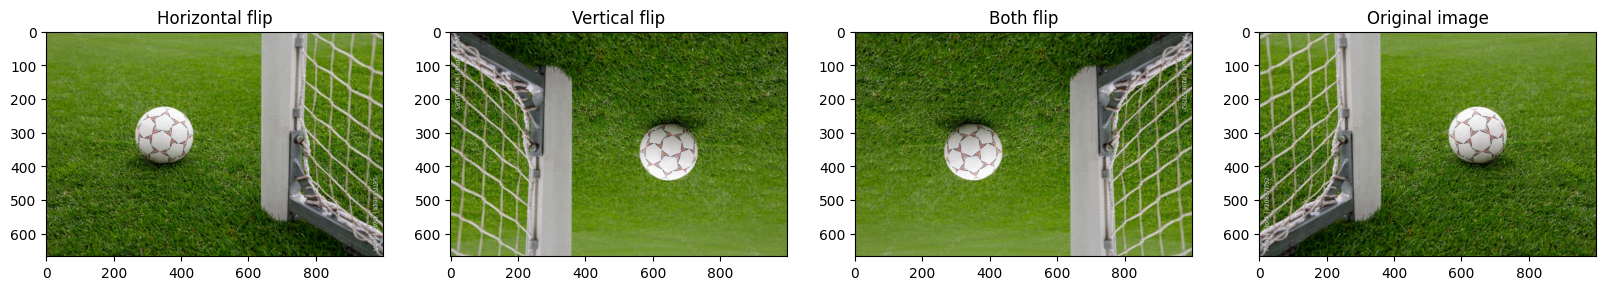

In [12]:
fb_img_rgb_flipped_horz = cv2.flip(fb_img_rgb, 1)
fb_img_rgb_flipped_vert = cv2.flip(fb_img_rgb, 0)
fb_img_rgb_flipped_both = cv2.flip(fb_img_rgb, -1)

plt.figure(figsize=[20, 5])

# Horizontal flip
plt.subplot(1, 4, 1)
plt.imshow(fb_img_rgb_flipped_horz)
plt.title("Horizontal flip")

# Vertical flip
plt.subplot(1, 4, 2)
plt.imshow(fb_img_rgb_flipped_vert)
plt.title("Vertical flip")

# Both flip
plt.subplot(1, 4, 3)
plt.imshow(fb_img_rgb_flipped_both)
plt.title("Both flip")

# Original image
plt.subplot(1, 4, 4)
plt.imshow(fb_img_rgb)
plt.title("Original image");

<a id = "5."></a>
# 5. Drawing Lines on Images

In this section, we'll explore how to draw lines on images using OpenCV, which is a useful technique for annotation, highlighting features, or creating graphics. Drawing a line involves specifying its start and end points, color, and thickness.

We'll demonstrate the use of the `cv2.line()` function in OpenCV. 

``` python
    img = cv2.line(img, pt1, pt2, color[, thickness[, lineType[, shift]]])
```

`img`: The output image that has been annotated.

The function has **4 required arguments**:

1. `img`:   Image on which we will draw a line

2. `pt1`:   First point(x,y location) of the line segment

3. `pt2`:   Second point of the line segment

4. `color`: Color of the line which will be drawn
    
Other optional arguments that are important for us to know include:

1. `thickness`: Integer specifying the line thickness. Default value is 1.

2. `lineType`:  Type of the line. Default value is 8 which stands for an 8-connected line. Usually, cv2.LINE_AA (antialiased or smooth line) is used for the lineType.


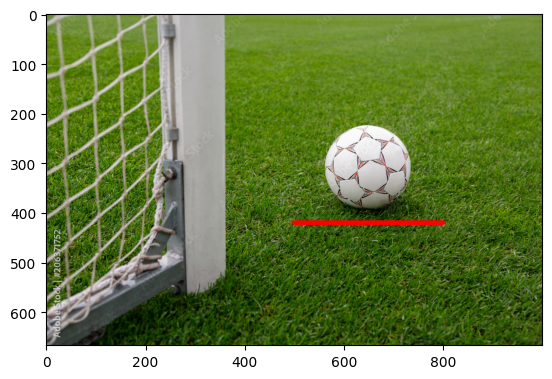

In [68]:
image_copy_line = fb_img_rgb.copy()

# The line starts from (500,420) and ends at (800,420)
# The color of the line is RED (Recall that we are using the image in RGB format) color = (RED, GREEN, BLUE)
# Thickness of line is 8px
# Linetype is cv2.LINE_AA

cv2.line(img = image_copy_line,
         pt1 = (500, 420),
         pt2 = (800, 420),
         color = (255, 0, 0),
         thickness=8,
         lineType=cv2.LINE_AA)

plt.imshow(image_copy_line);

<a id = "6."></a>
# 6. Drawing Circle on Images

In this part of the notebook, we focus on the technique of drawing circles on images, a common task in image annotation and graphic design. Drawing circles can be useful for highlighting areas of interest, creating visual markers, or adding graphical elements to an image.

We will explore the use of the `cv2.circle()` function in OpenCV.

``` python
img = cv2.circle(img, center, radius, color[, thickness[, lineType[, shift]]])
```

`img`: The output image that has been annotated.

The function has **4 required arguments**:

1. `img`:    Image on which we will draw a line

2. `center`: Center of the circle

3. `radius`: Radius of the circle

4. `color`:  Color of the circle which will be drawn
    
Next, let's check out the (optional) arguments which we are going to use quite extensively.

1. `thickness`: Thickness of the circle outline (if positive). 
If a negative value is supplied for this argument, it will result in a filled circle.

2. `lineType`:  Type of the circle boundary. This is exact same as lineType argument in `cv2.line()`.

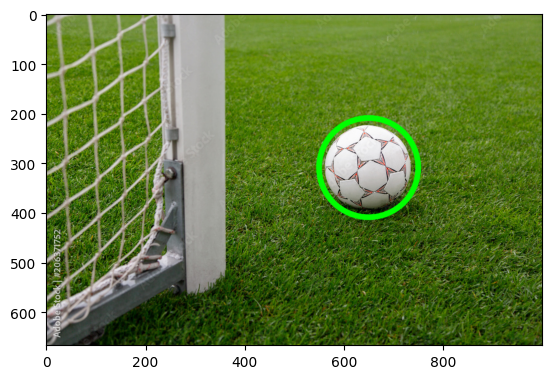

In [67]:
image_copy_circle = fb_img_rgb.copy()

cv2.circle(img = image_copy_circle,
           center = (650, 309),
           radius = 100,
           color = (0, 255, 0),
           thickness = 10,
           lineType = cv2.LINE_AA)

plt.imshow(image_copy_circle);

<a id = "7."></a>
# 7. Drawing Rectangle on Images

This section focuses on how to annotate images with rectangular shapes using OpenCV. This is a fundamental technique in image processing, widely used for framing areas of interest, creating bounding boxes in object detection, or simply as a graphical element.

In this section, we will cover the use of the `cv2.rectangle()` function. 

``` python
    img = cv2.rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]])
```

`img`: The output image that has been annotated.

The function has **4 required arguments**:

1. `img`: Image on which the rectangle is to be drawn.

2. `pt1`: Vertex of the rectangle. Usually we use the **top-left vertex** here.

3. `pt2`: Vertex of the rectangle opposite to pt1. Usually we use the **bottom-right** vertex here.

4. `color`: Rectangle color
    
Next, let's check out the (optional) arguments which we are going to use quite extensively.

1. `thickness`: Thickness of the circle outline (if positive). If a negative value is supplied for this argument, it will result in a filled rectangle.

2. `lineType`: Type of the circle boundary. This is exact same as lineType argument in 
    `cv2.line()`

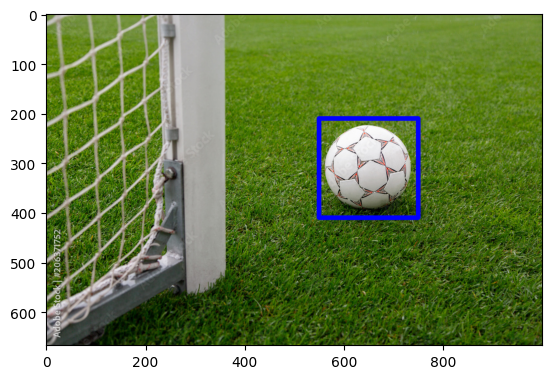

In [65]:
image_copy_rect = fb_img_rgb.copy()

cv2.rectangle(img = image_copy_rect,
              pt1 = (550, 210),
              pt2 = (750, 410),
              color = (0, 0, 255),
              thickness = 8,
              lineType = cv2.LINE_AA)

plt.imshow(image_copy_rect);

<a id = "8."></a>
# 8. Adding Text on Images
 
 This section is dedicated to the technique of overlaying text on images using OpenCV. This is an essential skill for image annotation, labeling, and adding descriptive or informative content directly onto images.

In this part of the notebook, we will explore how to use the `cv2.putText()` function in OpenCV.

``` python
    img = cv2.putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])
```

`img`: The output image that has been annotated.

The function has **6 required arguments**:

1. `img`: Image on which the text has to be written.

2. `text`: Text string to be written.

3. `org`: Bottom-left corner of the text string in the image.

4. `fontFace`: Font type

5. `fontScale`: Font scale factor that is multiplied by the font-specific base size.

6. `color`: Font color
 
Other optional arguments that are important for us to know include:

1. `thickness`: Integer specifying the line thickness for the text. Default value is 1.

2. `lineType`: Type of the line. Default value is 8 which stands for an 8-connected line. Usually, `cv2.LINE_AA` (antialiased or smooth line) is used for the lineType.


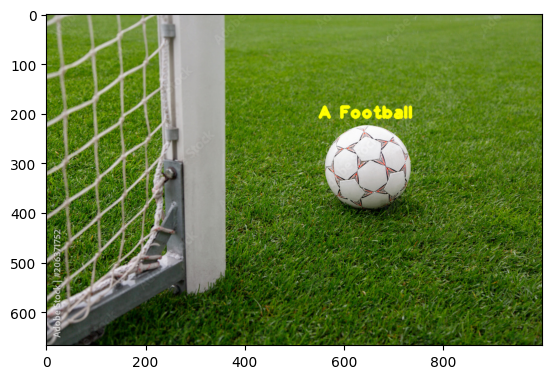

In [70]:
image_copy_text = fb_img_rgb.copy()

cv2.putText(img = image_copy_text,
            text = "A Football",
            org = (550, 210),
            fontFace = cv2.FONT_HERSHEY_PLAIN,
            fontScale = 2.3,
            color = (255, 255, 0),
            thickness = 5,
            lineType = cv2.LINE_AA)

plt.imshow(image_copy_text);

<a id = "c"></a>
# <font color = "green"> Conclusion </font>

Thank you for journeying through this notebook. We have covered essential techniques starting from pixel-level manipulations, image resizing, cropping, flipping, and various annotation methods like drawing lines, circles, rectangles, and adding text to images.

I hope this notebook has provided you with a solid foundation in image processing and has sparked your interest in exploring further into the vast and exciting field of computer vision. Remember, the skills you've learned here are just the beginning. There's a whole world of advanced techniques and applications waiting for you in image processing and computer vision.

Feel free to revisit any section, experiment with different parameters, and apply these techniques to your own projects. The best way to learn is by doing, so I encourage you to keep practicing and exploring. Happy coding, and best of luck in your future image processing endeavors!